# t-SNE vs UMAP vs PCA — Educational Walkthrough

This notebook demonstrates three dimensionality reduction techniques on a simple synthetic dataset. You'll see how the methods compare visually and learn when each one shines.

- PCA: fast linear baseline
- t-SNE: nonlinear, preserves local structure (great for visualization)
- UMAP: nonlinear, fast, preserves local and some global structure

## 1) Imports and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

/Users/aminpahlavani/anaconda3/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-07 09:20:22.579803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-07 09:20:22.579803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2) Generate a 3D synthetic dataset
We create four Gaussian blobs in 3D with different variances to make the problem interesting.

In [2]:
centers = [[2, -6, -6], [-1, 9, 4], [-8, 7, 2], [4, 7, 9]]
cluster_std = [1.0, 1.0, 2.0, 3.5]
X, y = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)
X[:3], y[:10]

(array([[ 3.78092405,  4.36112394,  8.01763723],
        [-7.58323438,  2.91653026,  1.50564523],
        [ 2.95852774, 11.81497385,  8.47480545]]),
 array([3, 2, 3, 2, 1, 1, 0, 1, 3, 0]))

## 3) Visualize the 3D data (interactive)

In [3]:
df3d = pd.DataFrame(X, columns=['X', 'Y', 'Z'])
fig = px.scatter_3d(df3d, x='X', y='Y', z='Z', color=y.astype(str), opacity=0.75,
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title='3D Scatter: Four Blobs')
fig.update_traces(marker=dict(size=4, line=dict(width=0)))
fig.update_layout(showlegend=False, width=900, height=700)
fig.show()

## 4) Standardize features
Standardization is important so each feature contributes equally.

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[:3].round(3)

array([[ 0.83 ,  0.016,  0.973],
       [-1.39 , -0.209, -0.148],
       [ 0.669,  1.179,  1.051]])

## 5) PCA (2D)

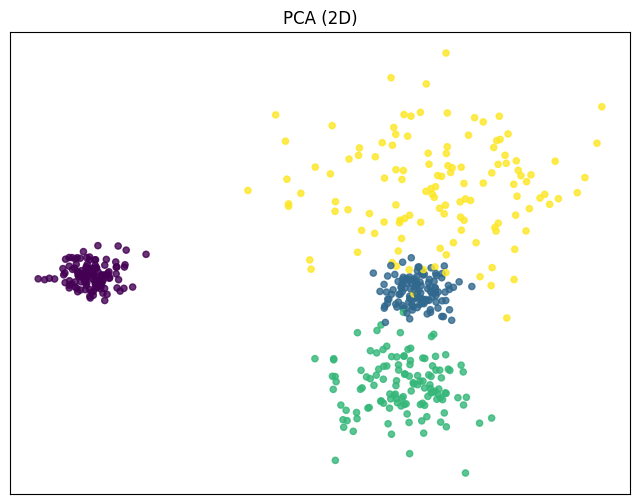

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=20, alpha=0.8)
ax.set_title('PCA (2D)')
ax.set_xticks([]); ax.set_yticks([]);
plt.show()

## 6) t-SNE (2D)
Key hyperparameters to try: `perplexity` (~5–50), `learning_rate` (50–1000), `n_iter` (>= 500).

/Users/aminpahlavani/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



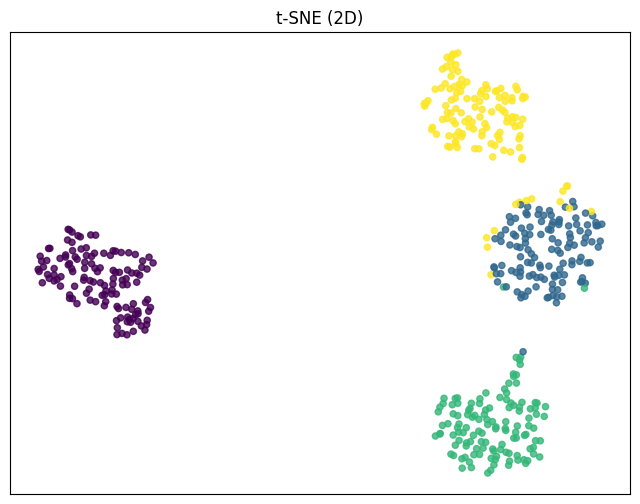

In [6]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X_std)
fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=20, alpha=0.8)
ax.set_title('t-SNE (2D)')
ax.set_xticks([]); ax.set_yticks([]);
plt.show()

## 7) UMAP (2D)
UMAP often benefits from tuning `n_neighbors` (local vs global structure) and `min_dist` (cluster tightness).

/Users/aminpahlavani/anaconda3/envs/ml/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


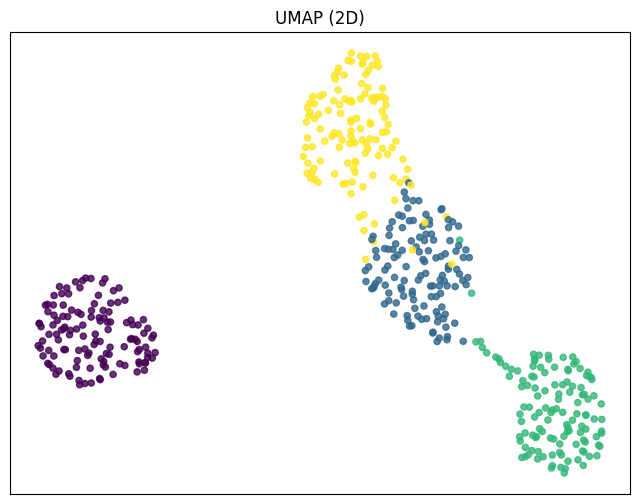

In [7]:
umap = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.5, spread=1.0)
X_umap = umap.fit_transform(X_std)
fig, ax = plt.subplots()
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=20, alpha=0.8)
ax.set_title('UMAP (2D)')
ax.set_xticks([]); ax.set_yticks([]);
plt.show()

## 8) Quick comparison notes
- PCA preserves global variance; fast and deterministic.
- t-SNE excels at local neighborhoods; distances between clusters are not always meaningful globally.
- UMAP preserves local structure and some global; often faster than t-SNE and scales better.